# Problem -> 2
# Drop-out rate analysis
Drugs are generally administered/prescribed by the physicians for a certain period of time or they are administered at regular intervals, but for various reasons patients might stop taking the treatment.


Consider following example for better understanding Let’s say you get a throat infection, the physician prescribes you an antibiotic for 10 days, but you stop taking the treatment after 3 days because of some adverse events. In the above example ideal treatment duration is 10 days but patients stopped taking treatment after 3 days due to adverse events. Patients stopping a treatment is called dropoff. We want to study dropoff for “Target Drug”, the aim is to generate insights on what events lead to patients stopping on “Target Drug”.


- It is said in the problem statement to assume ideal treatment duration for “Target Drug” is 1 year.

We will come up with analysis showing how drop-off rate is varying monthly where drop-off rate defined as number of patients dropping off each month.

- We will then come up with analysis to generate insights on what events are driving a patient to stop taking “Target Drug”

In [1]:
#read the data first
import pandas as pd

train_data = pd.read_parquet("train.parquet")

train_data.head()

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1


## Group each patient data in to a single row

In [2]:
# Converting the 'Date' column to datetime
train_data['Date'] = pd.to_datetime(train_data['Date'])

# Sorting the DataFrame by 'patient_id' and 'Date'
train_data.sort_values(by=['Patient-Uid', 'Date'], inplace=True)

#There is space in the name which will create problems in the future sow e replace it with '_'
train_data['Incident'] = train_data['Incident'].replace('TARGET DRUG', 'TARGET_DRUG')

# Grouping by 'patient_id' and aggregating 'Incident' column
grouped = train_data.groupby('Patient-Uid')['Incident'].apply(lambda x: ' '.join(x)).reset_index()

grouped.head()

,Patient-Uid,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,DRUG_TYPE_7 SYMPTOM_TYPE_2 DRUG_TYPE_7 SYMPTOM...
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_2 DRUG_TYPE_0 PRIMARY_DI...
2,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,DRUG_TYPE_0 PRIMARY_DIAGNOSIS DRUG_TYPE_7 DRUG...
3,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,DRUG_TYPE_0 DRUG_TYPE_7 DRUG_TYPE_2 PRIMARY_DI...
4,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,DRUG_TYPE_1 TEST_TYPE_1 SYMPTOM_TYPE_8 DRUG_TY...


In [3]:
grouped.shape

(27033, 2)

## Filter the required data ( which is --> patients who have taken 'TARGET_DRUG')

In [4]:
# Filter rows containing the TARGET_DRUG
filtered_df = grouped[grouped['Incident'].str.contains('TARGET_DRUG')]

filtered_df.shape


(9374, 2)

In [5]:
filtered_df.head()

,Patient-Uid,Incident
17659,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,DRUG_TYPE_7 TEST_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_...
17660,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,PRIMARY_DIAGNOSIS DRUG_TYPE_2 DRUG_TYPE_2 PRIM...
17661,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,DRUG_TYPE_5 DRUG_TYPE_5 DRUG_TYPE_7 SYMPTOM_TY...
17662,a0e9c414-1c7c-11ec-889a-16262ee38c7f,DRUG_TYPE_9 DRUG_TYPE_7 DRUG_TYPE_7 SYMPTOM_TY...
17663,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,DRUG_TYPE_8 DRUG_TYPE_7 SYMPTOM_TYPE_0 DRUG_TY...


## Make a list all the incident dates for each patient and add it to the dataset

In [6]:
from tqdm import tqdm

Patient_dates=[]

for patient_id in tqdm(list(filtered_df['Patient-Uid'].values)):
    each_patient_data = train_data[train_data['Patient-Uid']==patient_id]['Date'].values
    Patient_dates.append(each_patient_data)

print(len(Patient_dates))

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9374/9374 [1:20:47<00:00,  1.93it/s]

9374


In [7]:
filtered_df['Date_sequence']=Patient_dates
filtered_df.head()


/var/folders/xv/tgf0p61d1c59f73cc3jgzcyh0000gn/T/ipykernel_2105/2333862782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Date_sequence']=Patient_dates


,Patient-Uid,Incident,Date_sequence
17659,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,DRUG_TYPE_7 TEST_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_...,"[2015-04-14T00:00:00.000000000, 2015-09-07T00:..."
17660,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,PRIMARY_DIAGNOSIS DRUG_TYPE_2 DRUG_TYPE_2 PRIM...,"[2015-04-16T00:00:00.000000000, 2015-04-23T00:..."
17661,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,DRUG_TYPE_5 DRUG_TYPE_5 DRUG_TYPE_7 SYMPTOM_TY...,"[2015-09-16T00:00:00.000000000, 2015-11-13T00:..."
17662,a0e9c414-1c7c-11ec-889a-16262ee38c7f,DRUG_TYPE_9 DRUG_TYPE_7 DRUG_TYPE_7 SYMPTOM_TY...,"[2015-05-01T00:00:00.000000000, 2015-05-01T00:..."
17663,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,DRUG_TYPE_8 DRUG_TYPE_7 SYMPTOM_TYPE_0 DRUG_TY...,"[2015-04-16T00:00:00.000000000, 2015-09-11T00:..."


In [8]:
filtered_df.shape

(9374, 3)

## Make a list of only those dates in which the target_drug is taken by the patient and add it also to the dataset

In [9]:
target_drug_used_dates=[]
for j in tqdm(range(filtered_df.shape[0])):
    target_drug_used_dates_each_patient=[]
    for i, incident in enumerate(filtered_df.iloc[j]['Incident'].split()):
        if incident=="TARGET_DRUG":
            target_drug_used_dates_each_patient.append(filtered_df.iloc[j]['Date_sequence'][i])
    
    target_drug_used_dates.append(target_drug_used_dates_each_patient)
        

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9374/9374 [00:04<00:00, 1960.02it/s]


In [10]:
filtered_df['target_drug_used_dates']=target_drug_used_dates
filtered_df.head()

/var/folders/xv/tgf0p61d1c59f73cc3jgzcyh0000gn/T/ipykernel_2105/3098805507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['target_drug_used_dates']=target_drug_used_dates


,Patient-Uid,Incident,Date_sequence,target_drug_used_dates
17659,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,DRUG_TYPE_7 TEST_TYPE_0 DRUG_TYPE_0 DRUG_TYPE_...,"[2015-04-14T00:00:00.000000000, 2015-09-07T00:...","[2020-07-08T00:00:00.000000000, 2020-08-05T00:..."
17660,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,PRIMARY_DIAGNOSIS DRUG_TYPE_2 DRUG_TYPE_2 PRIM...,"[2015-04-16T00:00:00.000000000, 2015-04-23T00:...","[2018-04-24T00:00:00.000000000, 2018-05-17T00:..."
17661,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,DRUG_TYPE_5 DRUG_TYPE_5 DRUG_TYPE_7 SYMPTOM_TY...,"[2015-09-16T00:00:00.000000000, 2015-11-13T00:...","[2019-10-31T00:00:00.000000000, 2019-12-12T00:..."
17662,a0e9c414-1c7c-11ec-889a-16262ee38c7f,DRUG_TYPE_9 DRUG_TYPE_7 DRUG_TYPE_7 SYMPTOM_TY...,"[2015-05-01T00:00:00.000000000, 2015-05-01T00:...","[2018-04-05T00:00:00.000000000, 2018-06-24T00:..."
17663,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,DRUG_TYPE_8 DRUG_TYPE_7 SYMPTOM_TYPE_0 DRUG_TY...,"[2015-04-16T00:00:00.000000000, 2015-09-11T00:...","[2019-09-10T00:00:00.000000000, 2019-10-10T00:..."


### PART-1 Computing the drop-off rates

As it is given that the ideal duration for the TARGET_DRUG is 1 year, we can see when did the patient start using it and when did the patient stop using it. Then we can check if the duration is an year.

1) If the duration is not 1 year, then we can treat it as dropoff case and record the stoppage date for further analysis.

In [11]:
import numpy as np

#Here we are storing the number of patients dropping of each month with the help of a dictionary
counts_per_month={}

#We are also collecting the list of patients who stopped using target_drug 
list_of_dropoff_patients=[]

#Loop through the target_drug usage dates of each patient
for i,L in enumerate(tqdm(target_drug_used_dates)):

    #Now check the difference in dates of first usage and last usage if it is < 365, then it is the case of droppoff
    if int((L[-1]-L[0])/ np.timedelta64(1, 'D')) < 365:
        list_of_dropoff_patients.append(i)
        if np.datetime_as_string(L[0], unit='M') not in counts_per_month:
            counts_per_month[np.datetime_as_string(L[0], unit='M')]=1
        else:
            counts_per_month[np.datetime_as_string(L[0], unit='M')]+=1

counts_per_month

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 9374/9374 [00:00<00:00, 41255.33it/s]


{'2020-07': 269,
 '2019-10': 325,
 '2019-09': 230,
 '2020-02': 225,
 '2020-06': 258,
 '2018-12': 133,
 '2019-03': 110,
 '2018-08': 167,
 '2019-01': 141,
 '2018-05': 185,
 '2020-04': 293,
 '2019-05': 190,
 '2018-06': 187,
 '2019-02': 107,
 '2018-11': 128,
 '2019-11': 252,
 '2018-10': 142,
 '2018-03': 183,
 '2019-07': 167,
 '2019-12': 279,
 '2019-04': 148,
 '2019-06': 163,
 '2020-01': 254,
 '2020-03': 233,
 '2020-05': 256,
 '2018-09': 131,
 '2017-12': 4,
 '2018-07': 155,
 '2018-04': 215,
 '2017-10': 4,
 '2019-08': 239,
 '2018-01': 5,
 '2018-02': 6,
 '2017-11': 1,
 '2017-08': 2}

## Plot the dropoff rates per each month

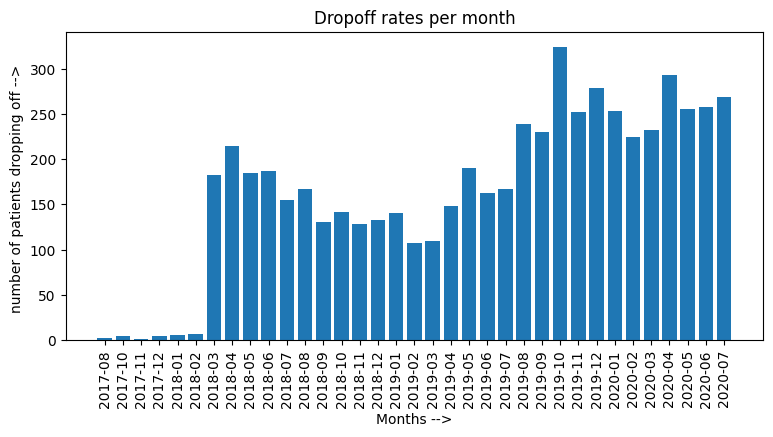

In [12]:
import matplotlib.pyplot as plt

#Sort the keys in order, so that we have the x-axis as the timeline
keys_list = sorted(list(counts_per_month.keys()))
#also get the coreesponding values
values_list= [counts_per_month[key] for key in keys_list]

#Plot in the format of a bar graph
plt.figure(figsize=(9,4))
plt.bar(keys_list,values_list)
plt.title("Dropoff rates per month")
plt.xlabel('Months -->')
plt.ylabel('number of patients dropping off --> ')
plt.xticks(rotation=90)
plt.show()

### PART-2 Gaining insight on which events are leading to drop off

For analysing what events are leading to patients stopping the target_drug, we need to get the list of symptoms on the dates before the date of stoppage of the target drug for the patients who are stopping it.

1) We already got the dropoff patients list from the above, lets check the events before the drop-off dates.
2) Let us take an average span of 3 incidents that happened before the last incident of target_drug taken by the patient.

In [13]:
#Store the events in the form of a dictionary with the counts of how many times they led to drop-off
events_dictionary={}

#iterate through the drop-off patients 
for position in tqdm(list_of_dropoff_patients):

    #get all the data regarding the drop-off patient wrt to the index
    row=filtered_df.iloc[position]

    #get all the incidents list of the patient first, then we can go through this list to find the events before dropoff
    all_incidents = row['Incident'].split()
    
    #This index stores the index of the date where the target_drug was taken last
    stopping_index=0

    #iterate through the dates and check if the last target_drug usage date matches any, if yes then note down its index 
    for i,current_date in enumerate(row['Date_sequence']):
        if current_date == row['target_drug_used_dates'][-1]:
            stopping_index =i
            break
    
    count=0 #This is for keeping track of the number of events noted down before the stoppage
    iter_index=stopping_index-1 #This is for getting the index of those events which lead to stoppage of the target_drug
    
    #use a while loop since we do not want to record the if the target drug itself was the event which doesnot make sense.
    while count < 3:
        #check if the previous incident is a target_drug, if yes then skip to the incident before it
        if all_incidents[iter_index] != 'TARGET_DRUG':
            #add the event to the dictionary if it is not present, else add to the counts of it
            if all_incidents[iter_index] not in events_dictionary:
                events_dictionary[all_incidents[iter_index]]=1
            else:
                events_dictionary[all_incidents[iter_index]]+=1
            count+=1
        
        #now to avoid error incase anny event is not found we stop searching
        if iter_index==0:
            break
        else:
            iter_index-=1#Store the events in the form of a dictionary with the counts of how many times they led to drop-off
events_dictionary={}

#iterate through the drop-off patients 
for position in tqdm(list_of_dropoff_patients):

    #get all the data regarding the drop-off patient wrt to the index
    row=filtered_df.iloc[position]

    #get all the incidents list of the patient first, then we can go through this list to find the events before dropoff
    all_incidents = row['Incident'].split()
    
    #This index stores the index of the date where the target_drug was taken last
    stopping_index=0

    #iterate through the dates and check if the last target_drug usage date matches any, if yes then note down its index 
    for i,current_date in enumerate(row['Date_sequence']):
        if current_date == row['target_drug_used_dates'][-1]:
            stopping_index =i
            break
    
    count=0 #This is for keeping track of the number of events noted down before the stoppage
    iter_index=stopping_index-1 #This is for getting the index of those events which lead to stoppage of the target_drug
    
    #use a while loop since we do not want to record the if the target drug itself was the event which doesnot make sense.
    while count < 3:
        #check if the previous incident is a target_drug, if yes then skip to the incident before it
        if all_incidents[iter_index] != 'TARGET_DRUG':
            #add the event to the dictionary if it is not present, else add to the counts of it
            if all_incidents[iter_index] not in events_dictionary:
                events_dictionary[all_incidents[iter_index]]=1
            else:
                events_dictionary[all_incidents[iter_index]]+=1
            count+=1
        
        #now to avoid error incase anny event is not found we stop searching
        if iter_index==0:
            break
        else:
            iter_index-=1

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 5787/5787 [00:04<00:00, 1159.01it/s]


### These are events which happened before the patient stopped using the target_drug

In [14]:
events_dictionary

{'PRIMARY_DIAGNOSIS': 4097,
 'DRUG_TYPE_11': 211,
 'DRUG_TYPE_1': 2073,
 'DRUG_TYPE_3': 908,
 'DRUG_TYPE_2': 1583,
 'DRUG_TYPE_7': 1191,
 'DRUG_TYPE_0': 1720,
 'TEST_TYPE_3': 75,
 'SYMPTOM_TYPE_0': 177,
 'DRUG_TYPE_8': 470,
 'DRUG_TYPE_9': 356,
 'DRUG_TYPE_6': 2427,
 'TEST_TYPE_1': 516,
 'SYMPTOM_TYPE_4': 12,
 'SYMPTOM_TYPE_9': 30,
 'DRUG_TYPE_5': 212,
 'DRUG_TYPE_10': 444,
 'SYMPTOM_TYPE_2': 47,
 'DRUG_TYPE_13': 77,
 'SYMPTOM_TYPE_15': 33,
 'TEST_TYPE_2': 45,
 'SYMPTOM_TYPE_17': 10,
 'SYMPTOM_TYPE_29': 20,
 'SYMPTOM_TYPE_10': 23,
 'DRUG_TYPE_15': 50,
 'DRUG_TYPE_14': 91,
 'SYMPTOM_TYPE_6': 92,
 'DRUG_TYPE_12': 42,
 'TEST_TYPE_4': 2,
 'TEST_TYPE_0': 58,
 'SYMPTOM_TYPE_7': 92,
 'SYMPTOM_TYPE_16': 16,
 'SYMPTOM_TYPE_1': 41,
 'DRUG_TYPE_16': 6,
 'SYMPTOM_TYPE_12': 13,
 'SYMPTOM_TYPE_5': 28,
 'SYMPTOM_TYPE_3': 9,
 'SYMPTOM_TYPE_8': 19,
 'SYMPTOM_TYPE_14': 13,
 'SYMPTOM_TYPE_13': 13,
 'SYMPTOM_TYPE_11': 5,
 'SYMPTOM_TYPE_18': 2,
 'SYMPTOM_TYPE_22': 4,
 'DRUG_TYPE_4': 2,
 'SYMPTOM_TYPE_19': 

### Sort the events according to the frequency of occurance, like how many times each lead to the stoppage of the target_drug

1st seperate the keys and values, because we cannot sort the dictionary wrt to the values directly

In [15]:
keys_1=[]
values_1=[]
for k,v in events_dictionary.items():
    keys_1.append(k)
    values_1.append(v)

print(keys_1)
print(values_1)

['PRIMARY_DIAGNOSIS', 'DRUG_TYPE_11', 'DRUG_TYPE_1', 'DRUG_TYPE_3', 'DRUG_TYPE_2', 'DRUG_TYPE_7', 'DRUG_TYPE_0', 'TEST_TYPE_3', 'SYMPTOM_TYPE_0', 'DRUG_TYPE_8', 'DRUG_TYPE_9', 'DRUG_TYPE_6', 'TEST_TYPE_1', 'SYMPTOM_TYPE_4', 'SYMPTOM_TYPE_9', 'DRUG_TYPE_5', 'DRUG_TYPE_10', 'SYMPTOM_TYPE_2', 'DRUG_TYPE_13', 'SYMPTOM_TYPE_15', 'TEST_TYPE_2', 'SYMPTOM_TYPE_17', 'SYMPTOM_TYPE_29', 'SYMPTOM_TYPE_10', 'DRUG_TYPE_15', 'DRUG_TYPE_14', 'SYMPTOM_TYPE_6', 'DRUG_TYPE_12', 'TEST_TYPE_4', 'TEST_TYPE_0', 'SYMPTOM_TYPE_7', 'SYMPTOM_TYPE_16', 'SYMPTOM_TYPE_1', 'DRUG_TYPE_16', 'SYMPTOM_TYPE_12', 'SYMPTOM_TYPE_5', 'SYMPTOM_TYPE_3', 'SYMPTOM_TYPE_8', 'SYMPTOM_TYPE_14', 'SYMPTOM_TYPE_13', 'SYMPTOM_TYPE_11', 'SYMPTOM_TYPE_18', 'SYMPTOM_TYPE_22', 'DRUG_TYPE_4', 'SYMPTOM_TYPE_19', 'DRUG_TYPE_17', 'SYMPTOM_TYPE_23']
[4097, 211, 2073, 908, 1583, 1191, 1720, 75, 177, 470, 356, 2427, 516, 12, 30, 212, 444, 47, 77, 33, 45, 10, 20, 23, 50, 91, 92, 42, 2, 58, 92, 16, 41, 6, 13, 28, 9, 19, 13, 13, 5, 2, 4, 2, 1, 4, 1]

### Apply the sorting on the values list, and also sort the keys list, so that mapping is not lost

In [16]:
def bubble_sort(arr,arr_1):
    n = len(arr)

    # Traverse through all array elements
    for i in range(n):
        # Last i elements are already in place, so no need to compare them again
        for j in range(0, n - i - 1):
            # Swap if the element found is greater than the next element
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j] 
                arr_1[j], arr_1[j + 1] = arr_1[j + 1], arr_1[j] 

bubble_sort(values_1,keys_1)

### Plot the events according to their frequency of occurance before the stoppage of the target_drug

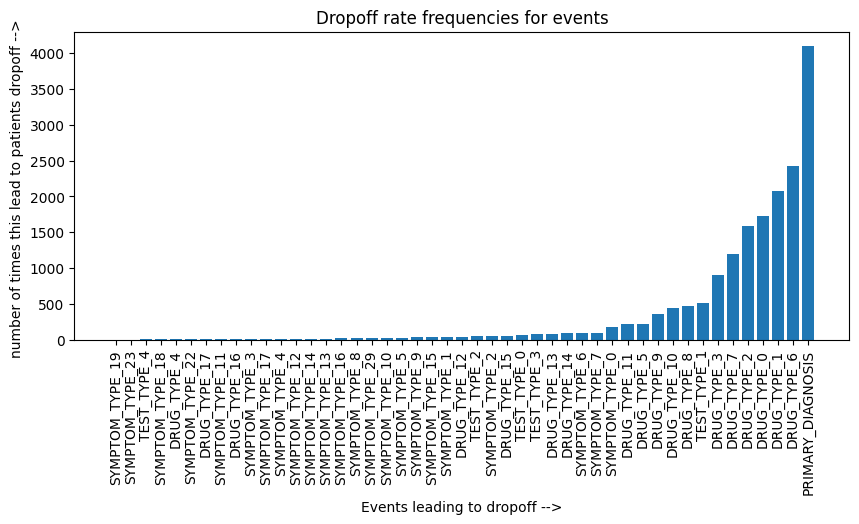

In [17]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,4))
plt.bar(keys_1,values_1)
plt.title("Dropoff rate frequencies for events")
plt.xlabel('Events leading to dropoff -->')
plt.ylabel('number of times this lead to patients dropoff --> ')
plt.xticks(rotation=90)
plt.show()